<a href="https://colab.research.google.com/github/khushivats0201/Machine-learning-/blob/main/ML_Lab_Ex_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# AIM
# To prepare the data suitable for the machine learning model, perform data cleaning, data
# reduction and data transformation on the given dataset using python implementation.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# DESCRIPTION
# Data preprocessing is a process of preparing the raw data and making it suitable for a machine
# learning model.
#  Data cleaning can be applied to “clean” the data by filling in missing values,
#  smoothing noisy data, identifying or removing outliers, and resolving inconsistencies.
#  Data reduction can reduce data size by, for instance, aggregating, eliminating
#  redundant features, or clustering.
#  Data transformations (e.g., normalization) may be applied, where data are scaled to
#  fall within a smaller range like 0.0 to 1.0.

In [6]:
# DATA CLEANING
# Data cleaning is the process of removing incorrect, corrupted, garbage, incorrectly formatted,
# duplicate, or incomplete data within a dataset. Having wrong or bad quality data can be
# detrimental to processes and analysis.
#  Check for Missing Values
# o Data imputation - attribute with 10% missing
# o Replace NaN with a Scalar Value (mean, median, mode, random, KNN etc.)
#  Check for Duplicates
#  Detect Outliers

In [7]:
# DATA REDUCTION:
# Data reduction techniques can be applied to obtain a reduced representation of the data set
# that is much smaller in volume, yet closely maintains the integrity of the original data.
#  Dimensionality reduction, numerosity reduction, data compression.
#  Feature selection and Feature extraction
#  Drop missing values
#  Drop the outliers
#  Drop duplicates

In [8]:
# DATA TRANSFORMATION:
# Data transformation is a technique used to convert the raw data into a suitable format.

#  Normalization - Data normalization involves converting all data variable into a given
# range.
# o Min-max - This method implements a linear transformation on the original
# Data
# o Z-score – This method normalizes the value using the mean and standard
# deviation
#  Encoding method - convert the categorical features into its numeric representation.
# o Label encoding - each label is assigned a unique integer based on alphabetical
# o ordering between 0 and n_classes-1 where n is the number of distinct labels.
# o One-Hot encoding - creates additional features based on the number of unique
# o values in the categorical feature, create dummy variables.

In [9]:
# 1. Calculate the % of missing values in a column (URK22AI1043)
import pandas as pd

# Load the dataset
path="/content/drive/MyDrive/ML/insurance.csv"
df = pd.read_csv(path)

def calculate_missing_percentage(df, column_name):
    missing_percentage = df[column_name].isnull().mean() * 100
    return missing_percentage

# Example usage
print(calculate_missing_percentage(df, 'bmi'))
#info tells data type and not null values

0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   sex               1338 non-null   object 
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   float64
 4   smoker            1338 non-null   object 
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   bool   
 7   region_northwest  1338 non-null   bool   
 8   region_southeast  1338 non-null   bool   
 9   region_southwest  1338 non-null   bool   
dtypes: bool(4), float64(4), object(2)
memory usage: 68.1+ KB


In [10]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [11]:
df.shape

(1338, 7)

In [12]:
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [13]:
# 2. Replace missing value with mean if the % of missing value is less than 10% (URK22AI1043)
def replace_missing_with_mean(df, column_name):
    missing_percentage = df[column_name].isnull().mean() * 100
    if missing_percentage < 10:
        df[column_name].fillna(df[column_name].mean(), inplace=True)
    return df

# Example usage
df = replace_missing_with_mean(df, 'bmi')
print(df['bmi'])

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64


/tmp/ipython-input-2936775660.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(df[column_name].mean(), inplace=True)


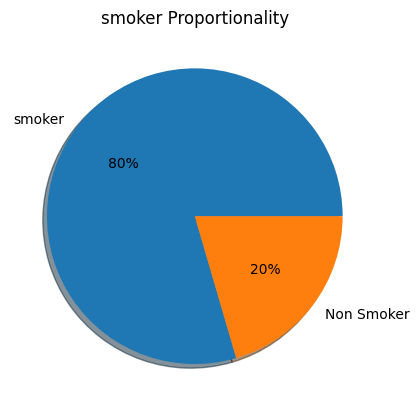

In [28]:
import matplotlib.pyplot as plt

plt.pie(df['smoker'].value_counts(), labels=[
        'smoker', 'Non Smoker'], autopct='%.f%%', shadow=True)
plt.title('smoker Proportionality')
plt.show()

In [14]:
# 3. Perform the mode imputation for a categorical data (URK22AI1043)
def mode_imputation(df, column_name):
    mode_value = df[column_name].mode()[0]
    df[column_name].fillna(mode_value, inplace=True)
    return df

# Example usage
df = mode_imputation(df, 'region')
print(df['region'])

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object


/tmp/ipython-input-1922122170.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(mode_value, inplace=True)


In [15]:
# 4. Perform a KNN Imputer to estimate the missing values (URK22AI1043)
from sklearn.impute import KNNImputer

def knn_imputer(df, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[float, int])), columns=df.select_dtypes(include=[float, int]).columns)
    df[df_imputed.columns] = df_imputed
    return df

# Example usage
df = knn_imputer(df)
print(df)

       age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900       0.0    yes  southwest  16884.92400
1     18.0    male  33.770       1.0     no  southeast   1725.55230
2     28.0    male  33.000       3.0     no  southeast   4449.46200
3     33.0    male  22.705       0.0     no  northwest  21984.47061
4     32.0    male  28.880       0.0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1333  50.0    male  30.970       3.0     no  northwest  10600.54830
1334  18.0  female  31.920       0.0     no  northeast   2205.98080
1335  18.0  female  36.850       0.0     no  southeast   1629.83350
1336  21.0  female  25.800       0.0     no  southwest   2007.94500
1337  61.0  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [16]:
# 5. Drop the columns with more than 10% missing values and display the size (URK22AI1043)
def drop_columns_with_missing_values(df, threshold=10):
    threshold_percentage = threshold / 100
    df_dropped = df.loc[:, df.isnull().mean() <= threshold_percentage]
    return df_dropped

# Example usage
df_dropped = drop_columns_with_missing_values(df)
print(df_dropped.shape)
print(df_dropped)

(1338, 7)
       age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900       0.0    yes  southwest  16884.92400
1     18.0    male  33.770       1.0     no  southeast   1725.55230
2     28.0    male  33.000       3.0     no  southeast   4449.46200
3     33.0    male  22.705       0.0     no  northwest  21984.47061
4     32.0    male  28.880       0.0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1333  50.0    male  30.970       3.0     no  northwest  10600.54830
1334  18.0  female  31.920       0.0     no  northeast   2205.98080
1335  18.0  female  36.850       0.0     no  southeast   1629.83350
1336  21.0  female  25.800       0.0     no  southwest   2007.94500
1337  61.0  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [17]:
# 6. Drop the rows with outlier Z-score value > 3 and display the size (URK22AI1043)
from scipy.stats import zscore

def drop_outliers(df):
    z_scores = zscore(df.select_dtypes(include=[float, int]))
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    df_outliers_removed = df[filtered_entries]
    return df_outliers_removed

# Example usage
df_outliers_removed = drop_outliers(df)
print(df_outliers_removed.shape)
print(df_outliers_removed)

(1309, 7)
       age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900       0.0    yes  southwest  16884.92400
1     18.0    male  33.770       1.0     no  southeast   1725.55230
2     28.0    male  33.000       3.0     no  southeast   4449.46200
3     33.0    male  22.705       0.0     no  northwest  21984.47061
4     32.0    male  28.880       0.0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1333  50.0    male  30.970       3.0     no  northwest  10600.54830
1334  18.0  female  31.920       0.0     no  northeast   2205.98080
1335  18.0  female  36.850       0.0     no  southeast   1629.83350
1336  21.0  female  25.800       0.0     no  southwest   2007.94500
1337  61.0  female  29.070       0.0    yes  northwest  29141.36030

[1309 rows x 7 columns]


In [18]:
# 7. Drop the duplicate rows based on more than 50% of columns having the same value (URK22AI1043)
def drop_custom_duplicates(df, threshold=0.5):
    num_columns = df.shape[1]
    threshold_count = int(threshold * num_columns)

    mask = df.apply(lambda row: (row == row.mode()[0]).sum() > threshold_count, axis=1)

    df_dropped_duplicates = df[~mask]
    return df_dropped_duplicates

# Example usage
df_dropped_duplicates = drop_custom_duplicates(df)
print(df_dropped_duplicates.shape)
print(df_dropped_duplicates)

(1338, 7)
       age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900       0.0    yes  southwest  16884.92400
1     18.0    male  33.770       1.0     no  southeast   1725.55230
2     28.0    male  33.000       3.0     no  southeast   4449.46200
3     33.0    male  22.705       0.0     no  northwest  21984.47061
4     32.0    male  28.880       0.0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1333  50.0    male  30.970       3.0     no  northwest  10600.54830
1334  18.0  female  31.920       0.0     no  northeast   2205.98080
1335  18.0  female  36.850       0.0     no  southeast   1629.83350
1336  21.0  female  25.800       0.0     no  southwest   2007.94500
1337  61.0  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]


/tmp/ipython-input-3691458235.py:6: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  mask = df.apply(lambda row: (row == row.mode()[0]).sum() > threshold_count, axis=1)


In [19]:
# 8. Rescale your data using min-max normalization for a numerical feature (URK22AI1043)
from sklearn.preprocessing import MinMaxScaler

def min_max_normalization(df, column_name):
    scaler = MinMaxScaler()
    df[[column_name]] = scaler.fit_transform(df[[column_name]])
    return df

# Example usage
df = min_max_normalization(df, 'bmi')
print(df['bmi'])

0       0.321227
1       0.479150
2       0.458434
3       0.181464
4       0.347592
          ...   
1333    0.403820
1334    0.429379
1335    0.562012
1336    0.264730
1337    0.352704
Name: bmi, Length: 1338, dtype: float64


In [20]:
# 9. Binarize the data by using binarizer class in Python (URK22AI1043)
from sklearn.preprocessing import Binarizer

def binarize_data(df, column_name, threshold=0.5):
    binarizer = Binarizer(threshold=threshold)
    df[[column_name]] = binarizer.fit_transform(df[[column_name]])
    return df

# Example usage
df = binarize_data(df, 'bmi', threshold=30)
print(df['bmi'])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1333    0.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: bmi, Length: 1338, dtype: float64


In [21]:
# 10. Perform the one-hot encoding for a categorical feature (URK22AI1043)
def one_hot_encoding(df, column_name):
    df_encoded = pd.get_dummies(df, columns=[column_name])
    return df_encoded

# Example usage
df = one_hot_encoding(df, 'region')
print(df)

       age     sex  bmi  children smoker      charges  region_northeast  \
0     19.0  female  0.0       0.0    yes  16884.92400             False   
1     18.0    male  0.0       1.0     no   1725.55230             False   
2     28.0    male  0.0       3.0     no   4449.46200             False   
3     33.0    male  0.0       0.0     no  21984.47061             False   
4     32.0    male  0.0       0.0     no   3866.85520             False   
...    ...     ...  ...       ...    ...          ...               ...   
1333  50.0    male  0.0       3.0     no  10600.54830             False   
1334  18.0  female  0.0       0.0     no   2205.98080              True   
1335  18.0  female  0.0       0.0     no   1629.83350             False   
1336  21.0  female  0.0       0.0     no   2007.94500             False   
1337  61.0  female  0.0       0.0    yes  29141.36030             False   

      region_northwest  region_southeast  region_southwest  
0                False             Fal

In [22]:
#Crafted With Love By Sam Naveenkumar .V